#### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
credit_card_Df=pd.read_csv('../creditcard.csv')

In [4]:
credit_card_Df.shape

(284807, 31)

#### Check null values

In [5]:
credit_card_Df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
credit_card_Df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Exploratary Data Analysis

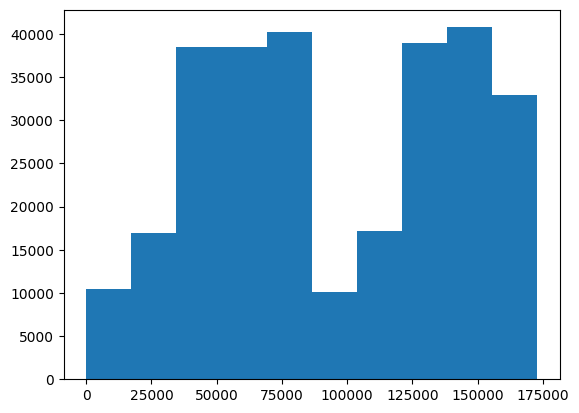

In [7]:
plt.hist(credit_card_Df['Time'])
plt.show()

In [8]:
credit_card_Df['Class'].unique()

array([0, 1])

#### Take sample from the population randomly and check how the outliers visible

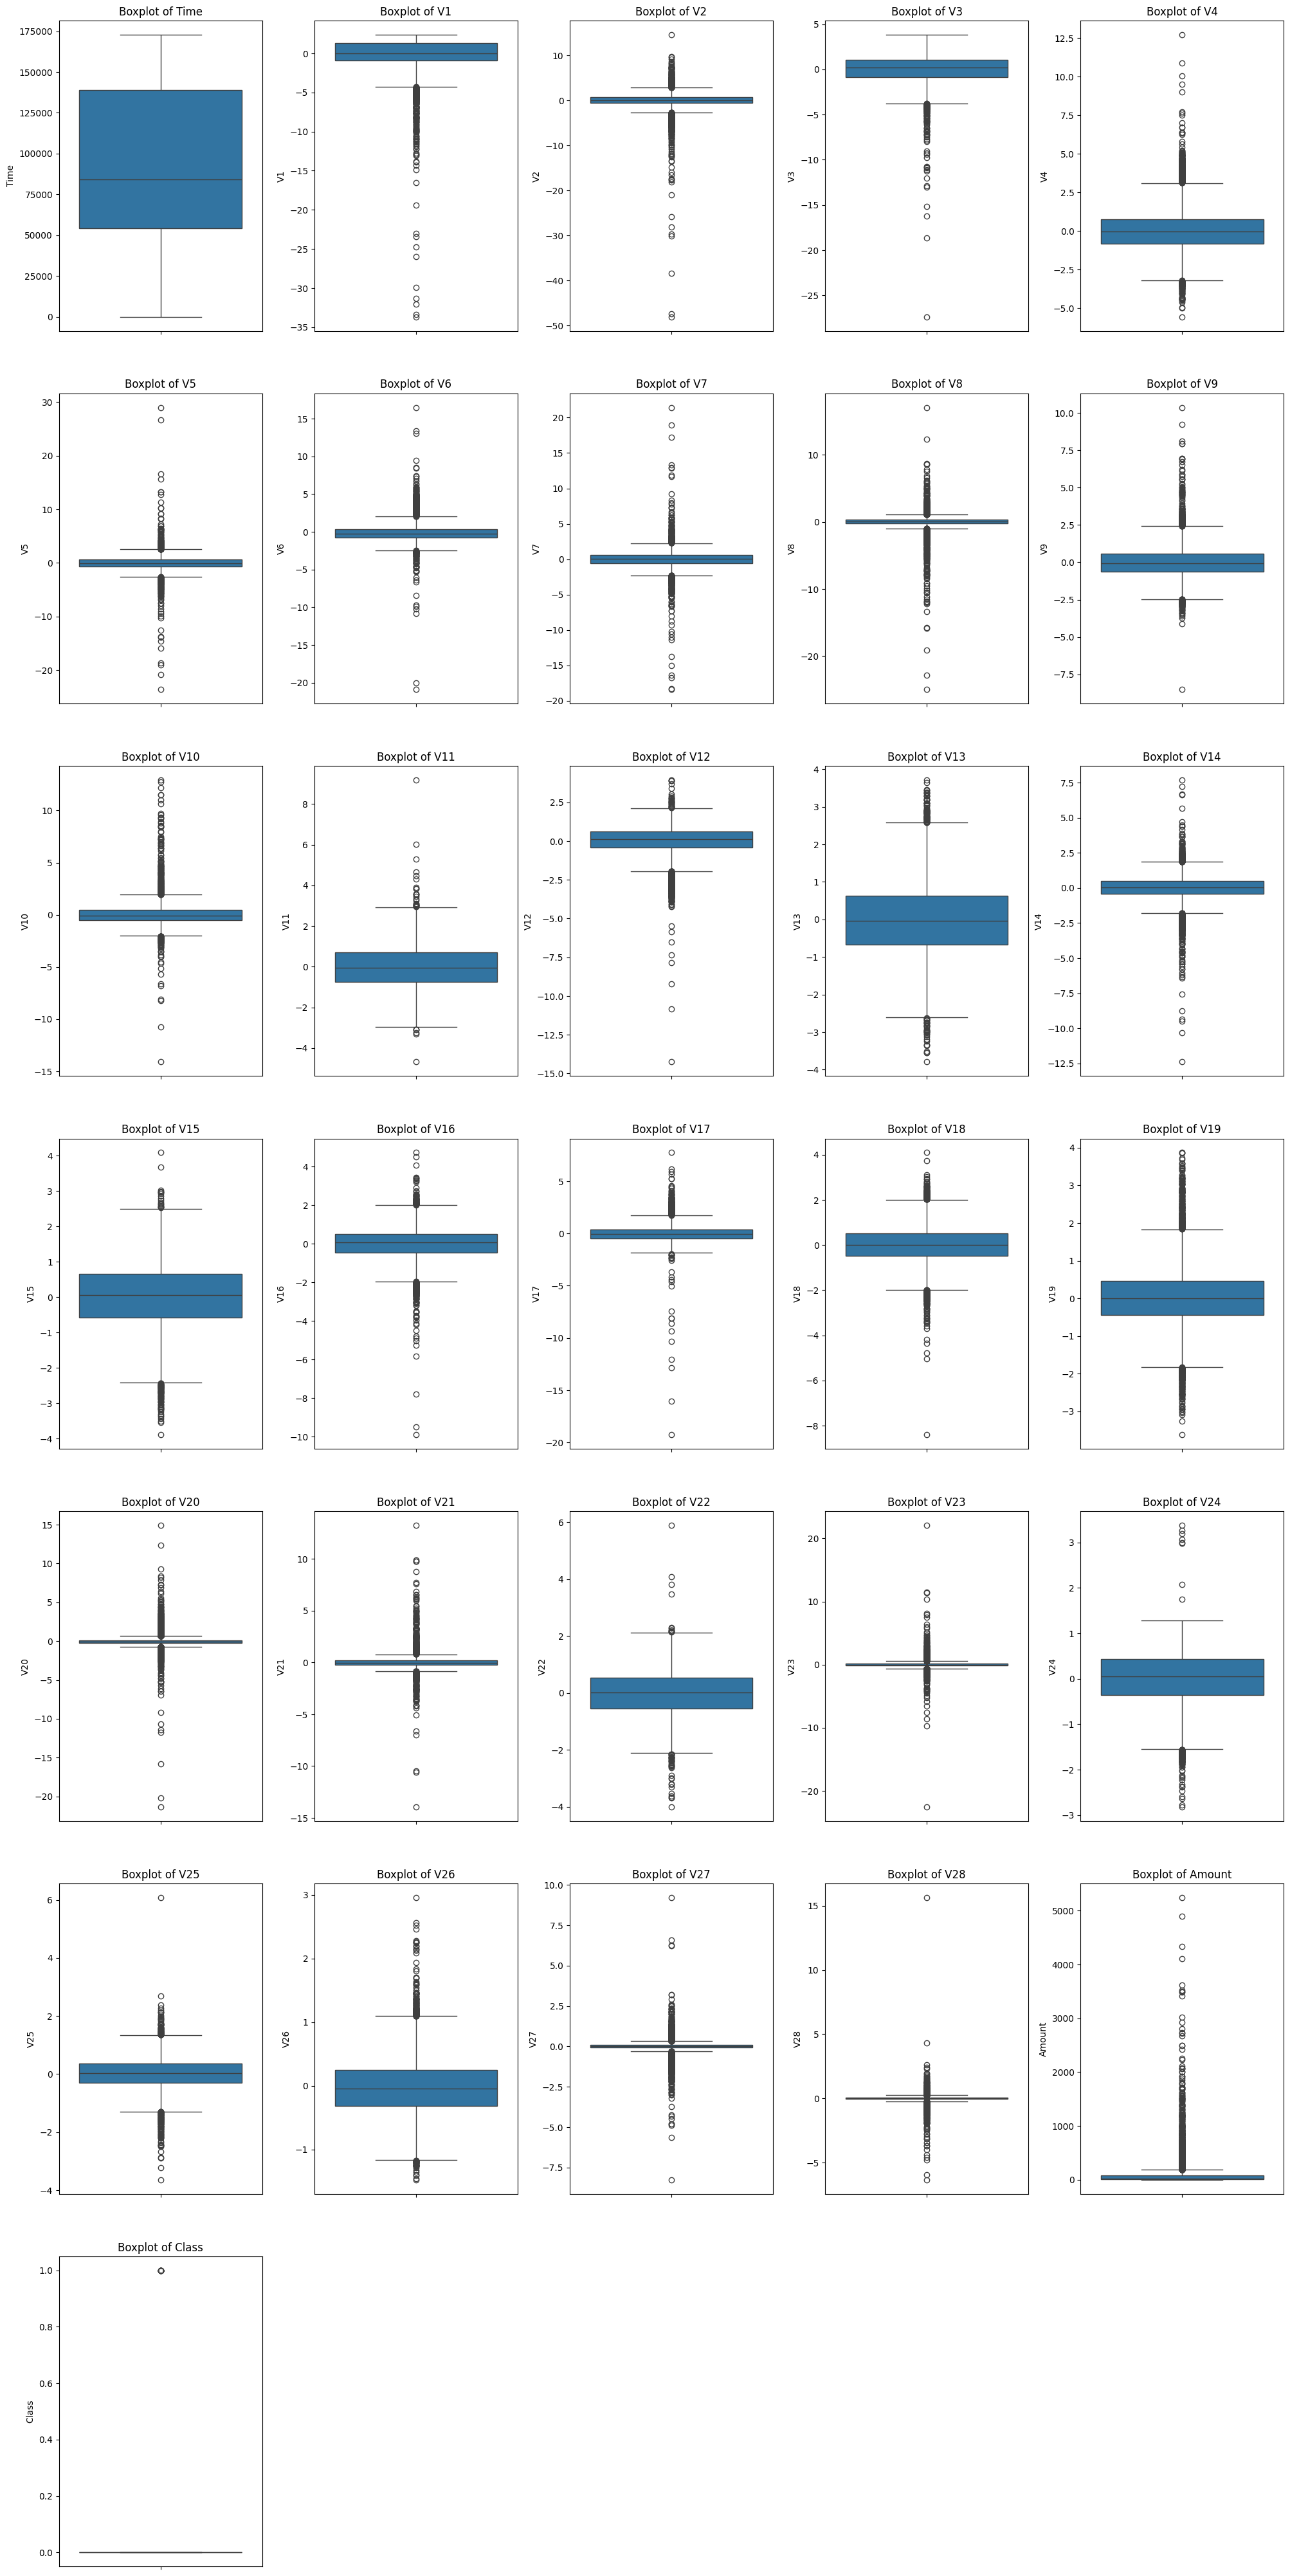

In [9]:

import seaborn as sns



sample_size = 10000 
if len(credit_card_Df) > sample_size:
    sampled_df = credit_card_Df.sample(n=sample_size, random_state=42)
else:
    sampled_df = credit_card_Df


num_cols = len(credit_card_Df.columns)
ncols = 5 
nrows = (num_cols // ncols) + (num_cols % ncols > 0)  

fig, ax = plt.subplots(ncols=ncols, nrows=nrows, figsize=(20, 40))
ax = ax.flatten()

# Plot each column as a boxplot
for index, col in enumerate(sampled_df.columns):
    sns.boxplot(y=sampled_df[col], ax=ax[index])
    ax[index].set_title(f"Boxplot of {col}")
    ax[index].set_xlabel("")  


for i in range(len(sampled_df.columns), len(ax)):
    fig.delaxes(ax[i])

plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()


#### Descriptive statistics of fraud and non fraud data

In [10]:
fraud = credit_card_Df[credit_card_Df['Class'] == 1]
non_fraud = credit_card_Df[credit_card_Df['Class'] == 0]

print("Fraud outliers:")
print(fraud[['V27', 'V28', 'Amount']].describe())

print("Non-fraud outliers:")
print(non_fraud[['V27', 'V28', 'Amount']].describe())


Fraud outliers:
              V27         V28       Amount
count  492.000000  492.000000   492.000000
mean     0.170575    0.075667   122.211321
std      1.376766    0.547291   256.683288
min     -7.263482   -1.869290     0.000000
25%     -0.020025   -0.108868     1.000000
50%      0.394926    0.146344     9.250000
75%      0.826029    0.381152   105.890000
max      3.052358    1.779364  2125.870000
Non-fraud outliers:
                 V27            V28         Amount
count  284315.000000  284315.000000  284315.000000
mean       -0.000295      -0.000131      88.291022
std         0.399847       0.329570     250.105092
min       -22.565679     -15.430084       0.000000
25%        -0.070852      -0.052950       5.650000
50%         0.001230       0.011199      22.000000
75%         0.090573       0.077962      77.050000
max        31.612198      33.847808   25691.160000


### Distribution of fraud and non fraud data over the dataset

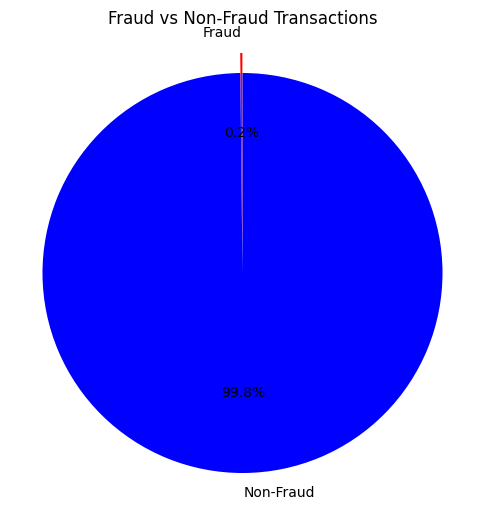

In [11]:
labels = ['Fraud', 'Non-Fraud']
sizes = [len(fraud), len(non_fraud)] 
colors = ['red', 'blue']
explode = (0.1, 0) 


plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=90)
plt.title('Fraud vs Non-Fraud Transactions')
plt.axis('equal') 
plt.show()